<a href="https://colab.research.google.com/github/bhkpriyanka/EIP4/blob/master/Session2/EIP4_A2_Ninth_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Assignment2 :***   
*Write the Code 9 file to achieve*:

* 99.4% accuracy  
* in 15k parameters  
* within 20 Epochs
 

*You are not allowed to use fully connected layer to convert any 2D channel to 1D channel and cannot use biases.*

##**[1]Import Libraries and modules**

In [1]:
# https://keras.io/

!pip install -q keras
import keras

Using TensorFlow backend.


*Why Keras?  
Its easier to use.It is a user-friendly high level DNN library framework running on top of Tensorflow/Theano/CNTK and helps in fast prototyping.Neural layers, cost functions, optimizers, initialization schemes, activation functions, and regularization schemes are all standalone modules that you can combine to create new models. New modules are simple to add, as new classes and functions.*

In [0]:
import numpy as np

import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.utils import np_utils

from keras.datasets import mnist #https://keras.io/datasets/

*MNIST Dataset : The MNIST dataset contains 70000 28x28 grayscale images with 10 different classes(digits 0-9). Keras splits it in a training set with 60000 images and a testing set with 10000 images.*


##**[2.] Load pre-shuffled MNIST data into train and test sets**

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train shape:(60000, 28, 28)


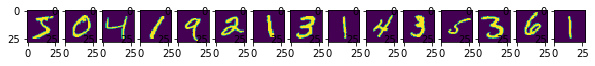

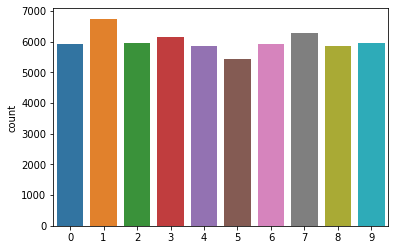

In [4]:
print ("X_train shape:{}".format(X_train.shape))
#plt.imshow(X_train[34095])

from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
x, y = 15, 1
for i in range(15):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

sns.countplot(y_train[:])


##**[3.]Preparing the Dataset**

In [0]:
#Reshaping the images data to a tensor of shape (num_samples, image_height, image_width, num_channels) i.e,including depth
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Scaling each of the images pixels to values between 0.0 and 1.0 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices(one hot encoding)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##**[4.]Building the Network**
[https://keras.io/getting-started/sequential-model-guide/](https://)

[https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/](https://)

In [10]:
from keras.layers import Activation
model = Sequential()

#ORIGINAL NETWORK 
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
#model.add(Flatten())
#model.add(Activation('softmax'))###

#MODIFIED NETWORK
model.add(Convolution2D(10, 3, 3, activation='relu',use_bias =False,input_shape=(28,28,1))) #>26x26x10
model.add(BatchNormalization())

model.add(Convolution2D(12, 3, 3, activation='relu',use_bias =False)) #>24x24x12
model.add(BatchNormalization()) 
model.add(Convolution2D(20, 3, 3, activation='relu',use_bias =False)) #>22x22x20 
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #>11x11x20
model.add(Convolution2D(10, 1, 1, activation='relu',use_bias =False)) #>11x11x10
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu',use_bias =False)) #>9x9x16
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Convolution2D(20, 3, 3, activation='relu',use_bias =False)) #>7x7x20
model.add(BatchNormalization())
model.add(Dropout(0.07))
model.add(Convolution2D(32, 3, 3, activation='relu',use_bias =False)) #>5x5x32
model.add(BatchNormalization()) 
model.add(Dropout(0.1))

model.add(AveragePooling2D(5,5))
model.add(Convolution2D(10, 1,use_bias =False))

model.add(Flatten()) #(10,)
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", use_bias=False, input_shape=(28, 28, 1...)`
  if sys.path[0] == '':




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", use_bias=False)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", use_bias=False)`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False)`


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 12)        1080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 12)        48        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 20)        2160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 20)        80        
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 20)       

##**[5.]Compiling ,Fitting and Scoring the Model**

In [12]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

*batch size = the number of training examples in one forward+backward pass.  
-->The higher the batch size, the more memory space you'll need!!  
-->With a larger batch size, you might get more “accurate” gradients because now you are optimizing the loss simultaneously over a larger set of images*

*The loss function is a measure on how good our model is at achieving the given objective,in our case correct classification of input digit image*

*An optimizer is used to minimize the loss(objective) function by updating the weights through gradients.*

In [13]:
model.fit(X_train, Y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 20s 341us/step - loss: 0.1476 - acc: 0.9610 - val_loss: 0.0446 - val_acc: 0.9861
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 17s 286us/step - loss: 0.0477 - acc: 0.9852 - val_loss: 0.0535 - val_acc: 0.9844
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 19s 308us/step - loss: 0.0359 - acc: 0.9886 - val_loss: 0.0343 - val_acc: 0.9888
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 19s 320us/step - loss: 0.0309 - acc: 0.9902 - val_loss: 0.0253 - val_acc: 0.9921
Epoch

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.018913698546471278, 0.9948]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[1.40286923e-11 1.54345803e-09 3.30290334e-07 2.69144191e-08
  3.07876924e-08 1.61779062e-11 1.33840367e-13 9.99999404e-01
  4.88298346e-10 2.40405512e-07]
 [4.47667858e-08 9.38561152e-06 9.99989867e-01 1.60252889e-09
  6.09739592e-09 6.06118905e-11 7.04544789e-07 6.87124802e-09
  4.61545913e-10 1.71504005e-10]
 [6.09208115e-08 9.99998331e-01 9.23481380e-08 9.42044290e-11
  1.15656334e-07 1.39493990e-08 2.36649655e-07 1.09193434e-06
  6.86190260e-09 3.77816445e-09]
 [9.99931097e-01 2.20768907e-11 3.83627707e-09 1.56696034e-09
  4.41788203e-11 1.76184560e-08 6.72630485e-05 2.66246969e-10
  3.20185308e-07 1.39631561e-06]
 [8.66896110e-10 2.80882841e-06 4.76615636e-09 1.90715707e-10
  9.99994636e-01 1.94193417e-09 3.93648634e-07 1.95515568e-07
  3.67688102e-08 1.82887629e-06]
 [3.29352297e-08 9.99996781e-01 1.59848000e-07 1.29545038e-11
  3.27539482e-07 1.92848781e-09 5.96594134e-07 2.21319010e-06
  4.55704274e-09 5.34666711e-09]
 [2.79740993e-13 6.85717737e-07 5.06279177e-12 1.29429659e

##Visualizing the Filters of desired Conv Layers

In [18]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print (layer_dict)

{'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7f0a1dccc898>, 'batch_normalization_1': <keras.layers.normalization.BatchNormalization object at 0x7f0a1dccc978>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7f0a1dcccd68>, 'batch_normalization_2': <keras.layers.normalization.BatchNormalization object at 0x7f0a1dcd39e8>, 'conv2d_3': <keras.layers.convolutional.Conv2D object at 0x7f0a101adb70>, 'batch_normalization_3': <keras.layers.normalization.BatchNormalization object at 0x7f0a101c7400>, 'dropout_1': <keras.layers.core.Dropout object at 0x7f0a10187470>, 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D object at 0x7f0a1018fcc0>, 'conv2d_4': <keras.layers.convolutional.Conv2D object at 0x7f0a10187ba8>, 'batch_normalization_4': <keras.layers.normalization.BatchNormalization object at 0x7f0a10146dd8>, 'conv2d_5': <keras.layers.convolutional.Conv2D object at 0x7f0a100e0d68>, 'batch_normalization_5': <keras.layers.normalization.BatchNormalization object at 0x7

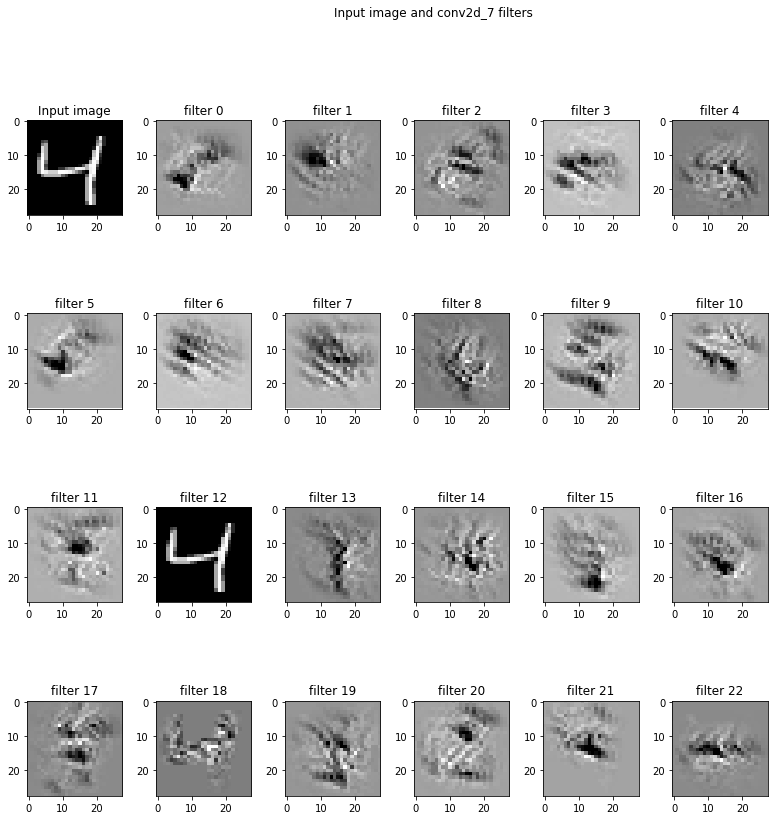

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_7'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()